In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

2024-11-08 21:15:27.171146: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 21:15:27.182645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731080727.196308    4603 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731080727.200182    4603 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 21:15:27.214225: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [15]:
img_height,img_width=256,256
batch_size=8
directory = '/home/axernox/Resnet50/tbx11k-simplified_can/traincan'
train = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2065 files belonging to 3 classes.


In [3]:
directoryval = '/home/axernox/Resnet50/tbx11k-simplified_can/valcan'
val = keras.utils.image_dataset_from_directory(
    directoryval,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 800 files belonging to 3 classes.


In [16]:
directorytest = '/home/axernox/Resnet50/tbx11k-simplified_can/testcan'
test = keras.utils.image_dataset_from_directory(
    directorytest,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 291 files belonging to 3 classes.


In [5]:
class_names = train.class_names
print(class_names)

['healthy', 'sick_no_tb', 'tb']


In [6]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=3,
                   weights=None)
for layer in pretrained_model.layers:
        layer.trainable=False
for layer in pretrained_model.layers[-10:]:
    layer.trainable = True

x = pretrained_model.output
x = Dense(512, activation='relu')(x)
output = Dense(3, activation='softmax')(x)      

resnet_model = Model(inputs=pretrained_model.input, outputs=output)


In [7]:
resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 24,638,339 (93.99 MB)

 Trainable params: 4,467,203 (17.04 MB)

 Non-trainable params: 20,171,136 (76.95 MB)

In [8]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = resnet_model.fit(
  train,
  validation_data=val,
  epochs=50,
  batch_size=8,
  callbacks=[early_stopping]
)

Epoch 1/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 148s 555ms/step - accuracy: 0.5742 - loss: 1.5975 - val_accuracy: 0.4625 - val_loss: 1.8961
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 139s 536ms/step - accuracy: 0.7505 - loss: 0.7763 - val_accuracy: 0.6300 - val_loss: 1.6131
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 140s 540ms/step - accuracy: 0.7290 - loss: 1.0929 - val_accuracy: 0.6575 - val_loss: 1.7632
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 151s 585ms/step - accuracy: 0.7891 - loss: 0.8923 - val_accuracy: 0.5500 - val_loss: 2.9398
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 140s 540ms/step - accuracy: 0.8449 - loss: 0.5108 - val_accuracy: 0.6363 - val_loss: 1.4327
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 141s 546ms/step - accuracy: 0.8546 - loss: 0.5093 - val_accuracy: 0.5088 - val_loss: 2.8198
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 130s 502ms/step - accuracy: 0.7863 - loss: 1.0576 - val_accuracy: 0.6787 - val_loss: 1.4493
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 137s 529ms/step - accuracy: 0.8448 -

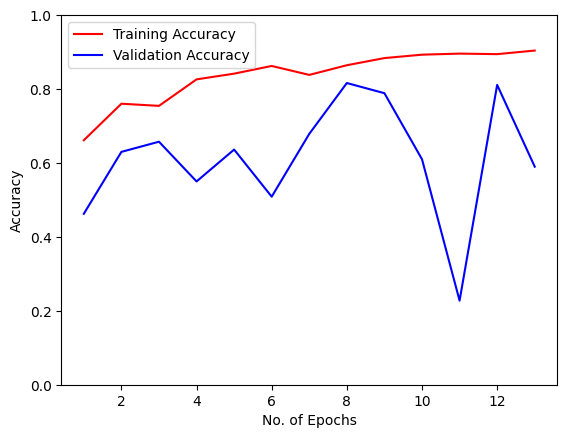

In [11]:
epochs = [i for i in range(1,14)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
pred = resnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 385ms/step


2024-11-08 16:15:48.101711: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
resnet_model.save('res50_canny_1.keras')

In [19]:
import json
with open("res50_canny_1.json", "w") as f:
    json.dump(history.history, f)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

     healthy       0.95      0.93      0.94       107
  sick_no_tb       0.96      0.79      0.87       107
          tb       0.70      0.90      0.79        77

    accuracy                           0.87       291
   macro avg       0.87      0.87      0.86       291
weighted avg       0.89      0.87      0.87       291



<Axes: >

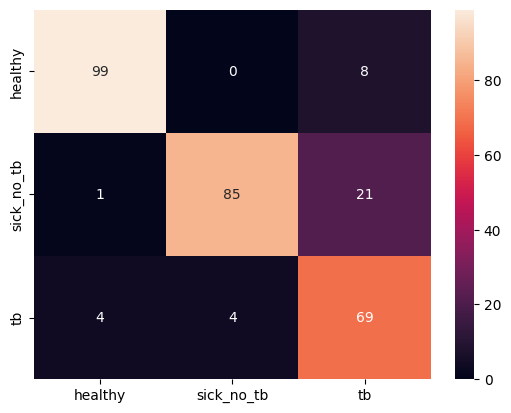

In [14]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
tb


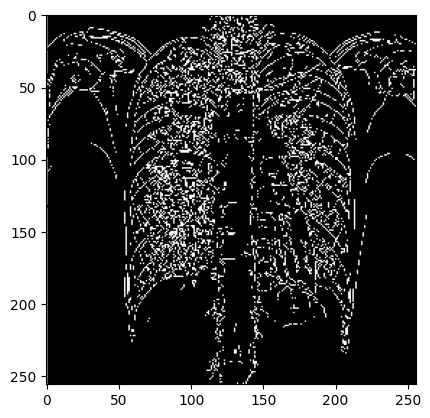

In [17]:
img = keras.utils.load_img('/home/axernox/Resnet50/tbx11k-simplified_can/valcan/tb/tb0145.png', target_size = (256,256))
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_pred = resnet_model.predict(img_array)
pred_label = class_names[np.argmax(np.round(img_pred,2))]
print(pred_label)

plt.imshow(img)


In [2]:
import shap
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

In [3]:
resnet_model = load_model('/home/axernox/Resnet50/res50_canny_1.keras')

I0000 00:00:1731080740.380956    4603 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
class_names = ['healthy', 'sick_no_tb', 'tb']

In [11]:
img1 = image.load_img('/home/axernox/Resnet50/tbx11k-simplified_can/valcan/tb/tb1181.png', target_size=(256, 256))
img_array1 = image.img_to_array(img1)
#img_array = np.expand_dims(img_array, axis=0)
print(img_array1.shape)

(256, 256, 3)


In [15]:
X1 = np.array([img_array1])
#X1 = preprocess_input(X1)
X1.shape

(1, 256, 256, 3)

In [16]:
pred = resnet_model.predict(X1)
pred_label = class_names[np.argmax(np.round(pred,2))]
print(pred)
print(pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[1.0670977e-09 3.9733714e-09 1.0000000e+00]]
tb


In [17]:
masker = shap.maskers.Image("inpaint_telea", img_array1.shape)
def f1(X):
    tmp = X.copy()
    return resnet_model(tmp)
explainer = shap.Explainer(f1, masker, output_names=class_names)

In [18]:
shap_values = explainer(X1[0:1], max_evals=500, batch_size=8, outputs=shap.Explanation.argsort.flip[:1])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:23, 23.93s/it]               


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


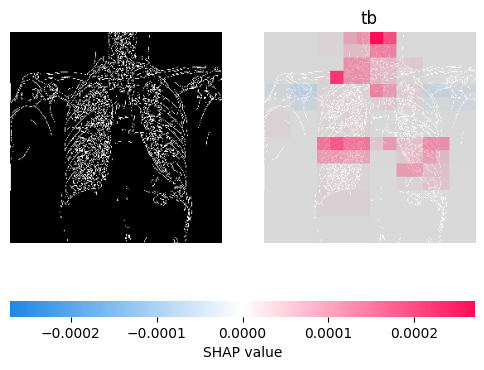

In [19]:
shap.image_plot(shap_values)